<a href="https://colab.research.google.com/github/serhii-hryhorenko/python-data-science/blob/master/python_practice_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
import pandas as pd


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [4]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [5]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

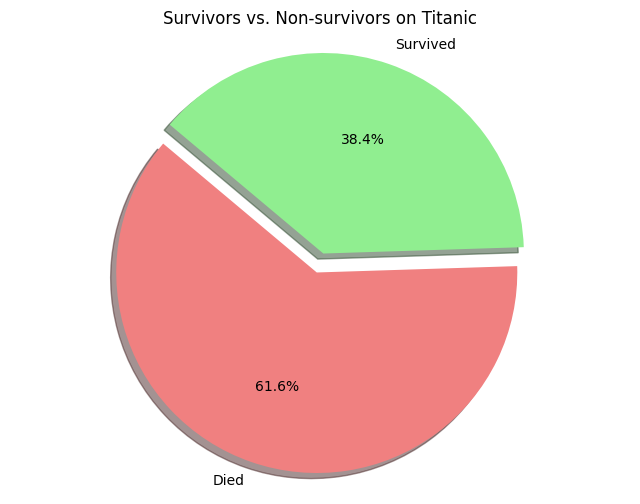

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

survived_counts = df['Survived'].value_counts()

labels = ['Died', 'Survived']
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(survived_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survivors vs. Non-survivors on Titanic')
plt.axis('equal')

plt.show()


Ми спочатку завантажуємо дані та обробляємо їх, визначаючи кількість виживших та загиблих пасажирів. Потім ми створюємо кругову діаграму за допомогою бібліотеки matplotlib. Діаграма показує відсоток виживших та загиблих, де виживші представлені зеленим кольором, а загиблі - червоним.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


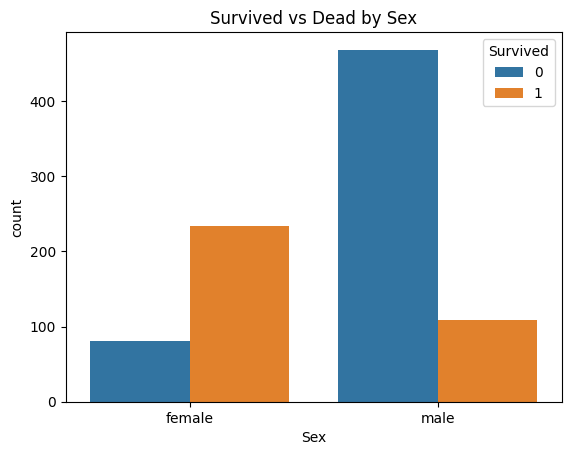

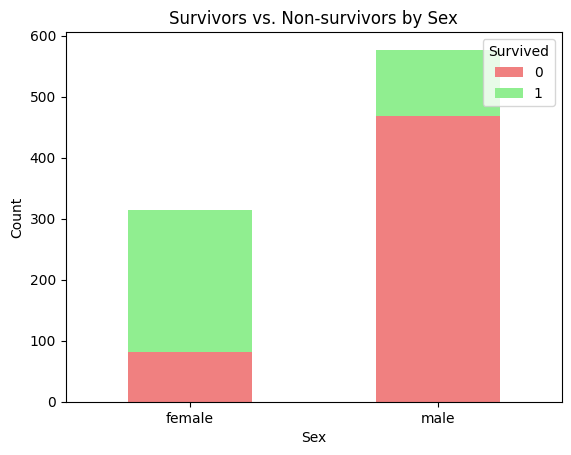

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("train.csv")

survived_counts = titanic_data.groupby(['Sex', 'Survived'], as_index=False).size()
survived_counts = survived_counts.pivot(index='Sex', columns='Survived', values='size')

survived_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])

plt.title('Survivors vs. Non-survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.legend(title='Survived', loc='upper right')
plt.xticks(rotation=0)
plt.show()


Ця стовпчаста стакована діаграма ілюструє розподіл виживших та загиблих пасажирів Титаніка за статтю. За її допомогою можна легко порівняти кількість виживших та загиблих серед чоловіків та жінок.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

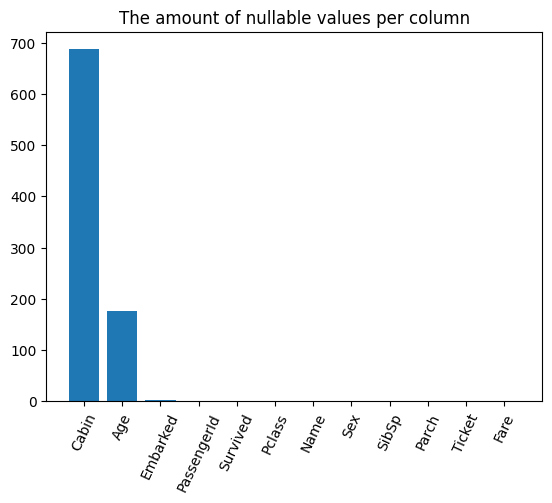

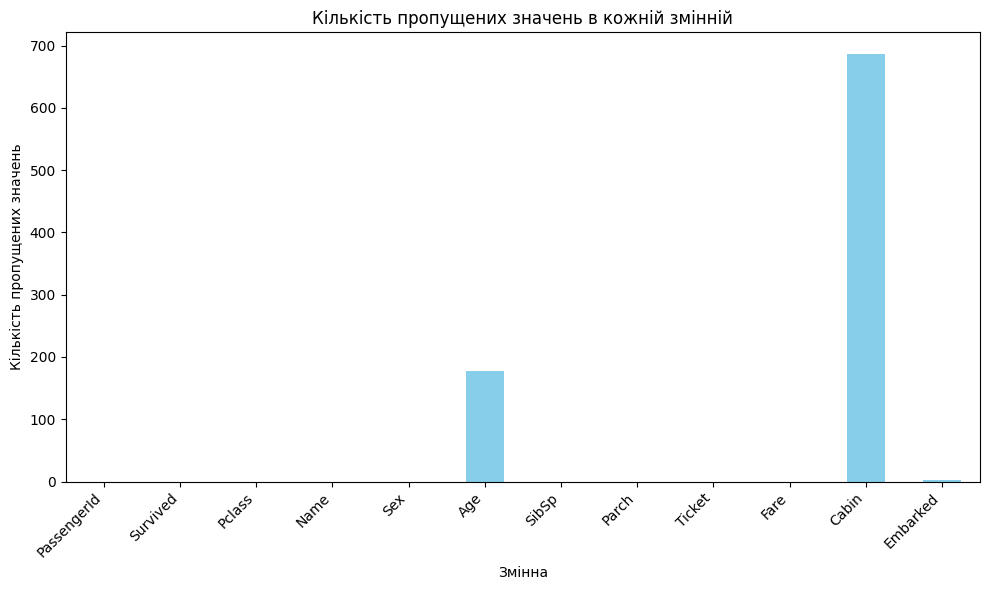

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("train.csv")

missing_values = titanic_data.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')

plt.title('Кількість пропущених значень в кожній змінній')
plt.xlabel('Змінна')
plt.ylabel('Кількість пропущених значень')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ця візуалізація показує кількість пропущених значень в кожній змінній датасету. Стовпчаста діаграма дозволяє легко визначити, які змінні мають найбільше пропущених значень та оцінити їхню важливість у подальшому аналізі даних.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

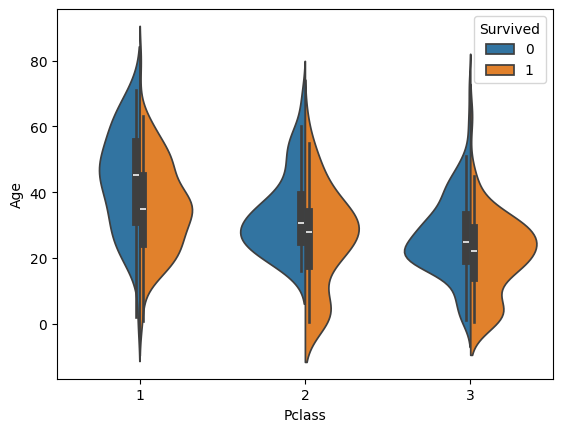

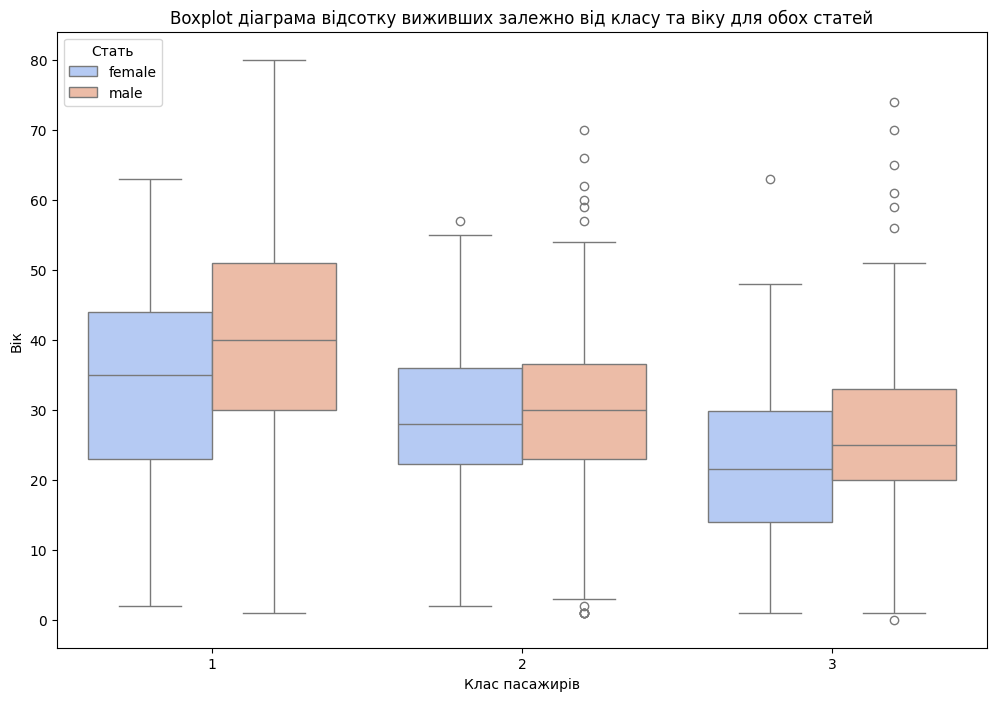

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('train.csv')

titanic_subset = titanic_data[['Pclass', 'Age', 'Sex', 'Survived']]
titanic_subset = titanic_subset.dropna(subset=['Age'])
titanic_subset['Age'] = titanic_subset['Age'].apply(lambda x: round(x))
titanic_subset['Survived_percentage'] = titanic_subset.groupby(['Pclass', 'Age'])['Survived'].transform('mean') * 100

plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Age', data=titanic_subset, hue='Sex', palette='coolwarm')
plt.title('Boxplot діаграма відсотку виживших залежно від класу та віку для обох статей')
plt.xlabel('Клас пасажирів')
plt.ylabel('Вік')
plt.legend(title='Стать')
plt.show()


Ця візуалізація показує розподіл віку пасажирів Титаніка для кожного класу та обох статей. Вона використовує boxplot діаграму, що дозволяє відобразити медіану, квартилі та виявити викиди в розподілі даних.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


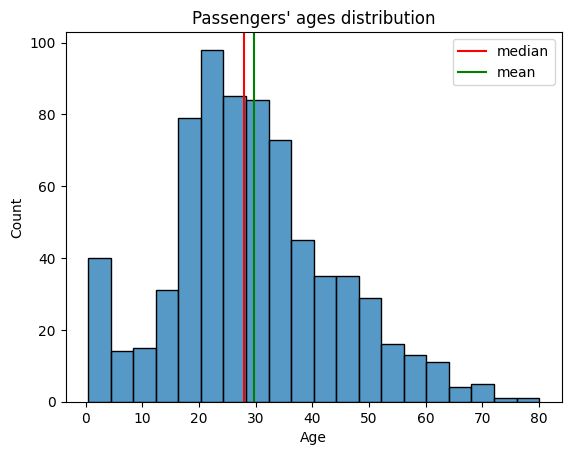

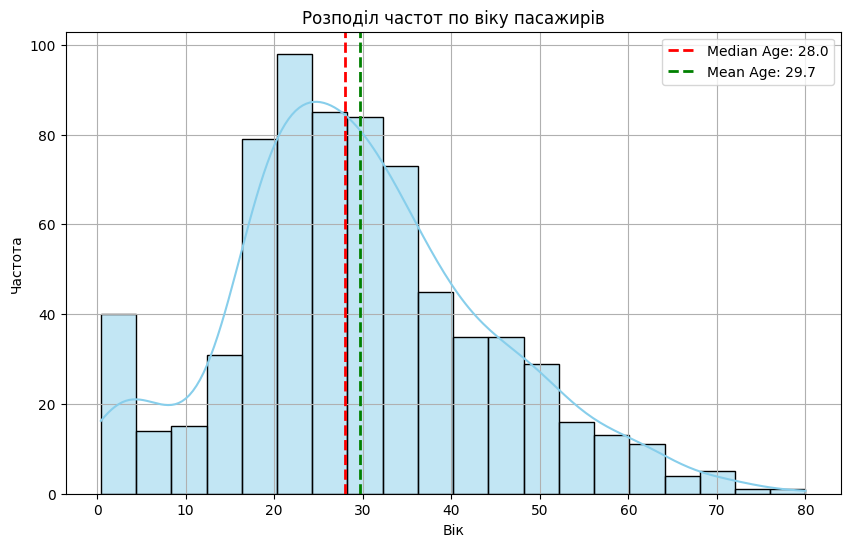

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


titanic_data = pd.read_csv("train.csv")
age_data = titanic_data['Age'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(age_data, kde=True, color='skyblue')

median_age = age_data.median()
mean_age = age_data.mean()
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.1f}')
plt.axvline(mean_age, color='green', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.1f}')

plt.title('Розподіл частот по віку пасажирів')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend()

plt.grid(True)
plt.show()


Ця візуалізація показує розподіл віку пасажирів за допомогою гістограми з щільністю ймовірності (KDE).

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як віковий розподіл пасажирів Титаніка вплинув на їхні шанси на виживання?

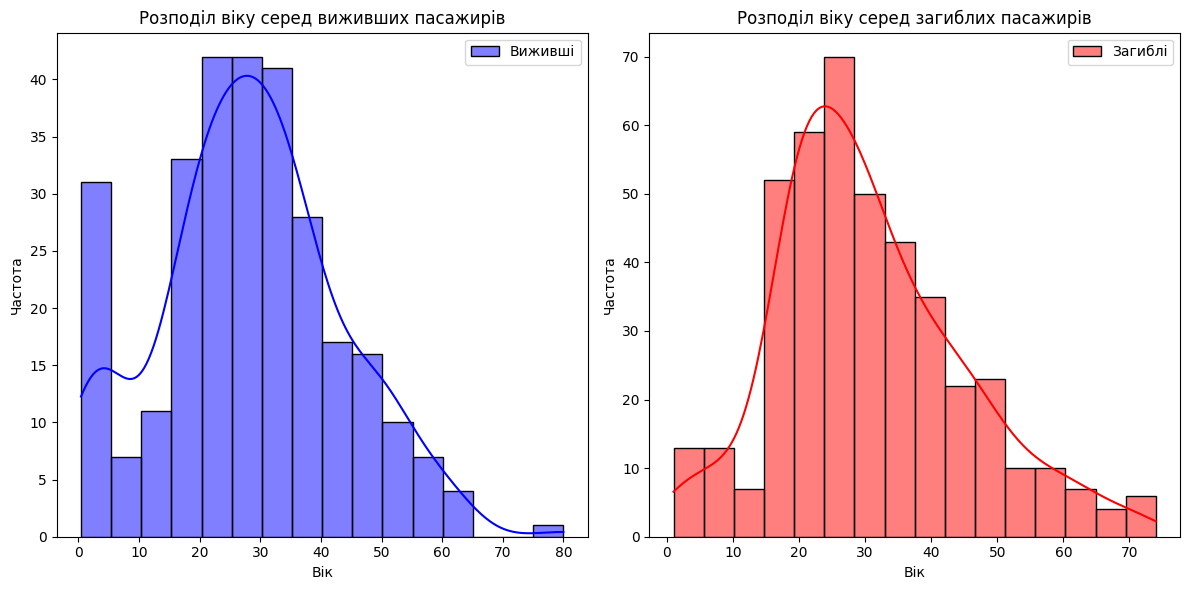

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv("train.csv")
titanic_subset = titanic_data[['Age', 'Survived']]
titanic_subset = titanic_subset.dropna(subset=['Age'])

survived_age = titanic_subset[titanic_subset['Survived'] == 1]['Age']
not_survived_age = titanic_subset[titanic_subset['Survived'] == 0]['Age']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(survived_age, kde=True, color='blue', label='Виживші')
plt.title('Розподіл віку серед виживших пасажирів')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(not_survived_age, kde=True, color='red', label='Загиблі')
plt.title('Розподіл віку серед загиблих пасажирів')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()


Ці графіки демонструють відмінності у розподілі віку між вижившими та загиблими пасажирами. Це може свідчити про те, що вік був одним з факторів, що вплинув на шанси на виживання пасажирів.

Розподіл віку загиблих пасажирів показує, що багато людей похилого віку не врятувались. Це може свідчити про те, що під час евакуації старші пасажири мали менші можливості отримати доступ до рятувальних човнів або шлюпок через фізичні обмеження.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

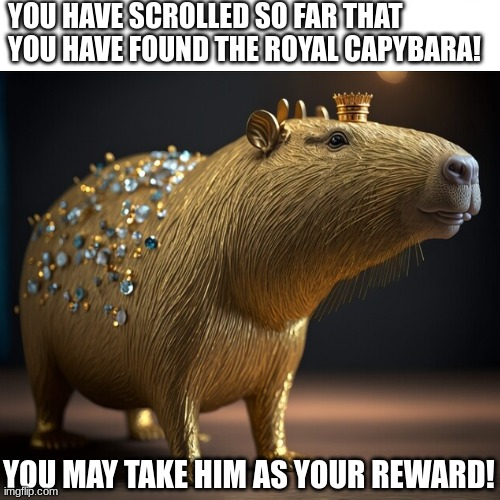